In [1]:
from test import plotterBase, kDistributions
from ROOT import *
import subprocess

Welcome to JupyROOT 6.22/02


In [2]:
# get data
pwd = subprocess.check_output("echo $PWD", shell=True, encoding="utf-8")
pwd = pwd.rstrip("\n")

path_selOutput = pwd + "/../SelectorOutput/DrellYan/"
file_names = ["DYtest", 
              "DY_inclusive_0j_nlo",                                      
              "DY_inclusive_012j_nlo"]

# get TFiles
files = {}
for file_name in file_names:
    this_path = path_selOutput + file_name + ".root"
    files[file_name] = TFile(this_path)

In [3]:
hists = {}
hist_name = "ZMass_ee"
x_axis = "M(ee)"
y_axis = "A.U"

for file_name in file_names:
    if file_name == "DYtest":
        hist_path = "DYm50/" + hist_name
        hist = files[file_name].Get(hist_path)
        hists[file_name] = hist
    elif file_name == "DY_inclusive_0j_nlo":
        hist_path = file_name + "/" + hist_name
        hist = files[file_name].Get(hist_path)
        hists[file_name] = hist
    elif file_name == "DY_inclusive_012j_nlo":
        hist_path = file_name + "/" + hist_name
        hist = files[file_name].Get(hist_path)
        hists[file_name] = hist
    else:
        raise(NameError)

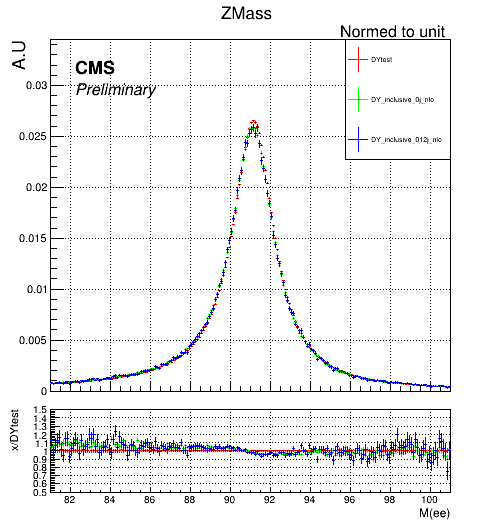

In [4]:
kDist = kDistributions()
kDist.get_hists(hists=hists, scale="normalize", rebin=10)
kDist.generate_ratio(base_name="DYtest")
kDist.deco_hists(y_title="A.U")
kDist.deco_ratio(x_title="M(ee) [GeV]", y_title="x/DYtest")
kDist.draw(info="Normed to unit")